In [1]:
# UCBSAN201811DATA2
# Data Analytics Boot Camp
# Instructor: Aash Anand
# Class TA: Allen Lu
# Python APIs Homework
# Due Saturday 01/12/19
# Joe J. abuzaid
######################################

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [3]:
for city in cities:
    print(city)

san cristobal
tasiilaq
henties bay
road town
airai
dikson
albany
sola
campbell river
barrow
bolivar
ostersund
omaha
ushuaia
borogontsy
chepareria
nikolskoye
pimentel
oranjestad
attawapiskat
esperance
yellowknife
pisco
illoqqortoormiut
sao filipe
fukue
vaini
severo-kurilsk
vitim
lompoc
clyde river
georgetown
belushya guba
butaritari
margate
garoua boulai
pavlogradka
kapaa
slatinany
bluff
chokurdakh
barentsburg
mataura
caraballeda
jiayuguan
smithers
bilma
taolanaro
hobart
altus
salinopolis
cabinda
boz
znamenskoye
natal
bethel
lichinga
sioux lookout
souillac
kenai
tuktoyaktuk
pelym
pelotas
arraial do cabo
uglekamensk
manbij
owando
sataua
kavieng
ribeira grande
rikitea
avarua
visim
puerto ayora
upernavik
kavaratti
stromness
hofn
luderitz
bredasdorp
aksu
bambous virieux
nizhneyansk
tumpat
klaksvik
nanortalik
honningsvag
lebu
cabo san lucas
thompson
cape town
marzuq
hermanus
long beach
takoradi
bjornevatn
panukulan
busselton
punta arenas
goderich
cabedelo
hirara
ilulissat
vardo
khatanga
yair

## Perform API Calls

In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call to meet the requirements
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key


In [5]:
# build the query url, request the data, convert to JSON
response = requests.get(url + "&q=" + "los angeles").json()

In [6]:
response

{'coord': {'lon': -118.24, 'lat': 34.05},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 54.77,
  'pressure': 1020,
  'humidity': 89,
  'temp_min': 50,
  'temp_max': 57.02},
 'visibility': 12874,
 'wind': {'speed': 2.73, 'deg': 64.0035},
 'clouds': {'all': 20},
 'dt': 1547189940,
 'sys': {'type': 1,
  'id': 3694,
  'message': 0.0049,
  'country': 'US',
  'sunrise': 1547218738,
  'sunset': 1547254997},
 'id': 5368361,
 'name': 'Los Angeles',
 'cod': 200}

In [7]:
# Need Data for latitude, Longtitude, humidity, wind speed, temperature, cloudiness, country, date:
response.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])

In [8]:
# Latitude
response["coord"]["lat"]

34.05

In [9]:
# longtitude
response["coord"]["lon"]

-118.24

In [10]:
# Humidity
response["main"]["humidity"]

89

In [11]:
# Wind Speed
response["wind"]["speed"]

2.73

In [12]:
# Temperature in Fehrenheit
response["main"]["temp"]

54.77

In [13]:
# Cloudiness
response["clouds"]["all"]

20

In [14]:
# City Name
response["name"]

'Los Angeles'

In [15]:
# Country two letter code
response["sys"]["country"]

'US'

In [16]:
# Date of the data taken
response['dt']

1547189940

In [29]:
# construct API calls
lat = []
long=[]
humidity = []
wind_speed = []
temp = []
cloudness = []
city_name = []
country = []
dt = []

for city in cities:
    try:
        # perform an api call on the city
        response = requests.get(url + "&q=" + city).json()

        # parse the information from the response (JSON)
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        humidity.append(response["main"]["humidity"])
        wind_speed.append(response["wind"]["speed"])
        temp.append(response["main"]["temp"])
        cloudness.append(response["clouds"]["all"])
        city_name.append(response["name"])  
        country.append(response["sys"]["country"])
        dt.append(response["dt"])
    
    except:
        print(city + " not found. Skipping...")
        pass

attawapiskat not found. Skipping...
illoqqortoormiut not found. Skipping...
belushya guba not found. Skipping...
barentsburg not found. Skipping...
taolanaro not found. Skipping...
sataua not found. Skipping...
nizhneyansk not found. Skipping...
saleaula not found. Skipping...
yomitan not found. Skipping...
saryshagan not found. Skipping...
andarab not found. Skipping...
marcona not found. Skipping...
fort saint john not found. Skipping...
sentyabrskiy not found. Skipping...
bargal not found. Skipping...
longlac not found. Skipping...
amderma not found. Skipping...
samusu not found. Skipping...
santarem not found. Skipping...
eldikan not found. Skipping...
tungkang not found. Skipping...
rawannawi not found. Skipping...
bengkulu not found. Skipping...
alotau not found. Skipping...
duz not found. Skipping...
tsihombe not found. Skipping...
coalcoman not found. Skipping...
stornoway not found. Skipping...
viligili not found. Skipping...
cam pha not found. Skipping...
cheuskiny not found.

In [33]:
# analyze the data after converting into DataFrame
df = pd.DataFrame({"City": city_name,
                   "Cloudness": cloudness,
                   "Country": country,
                   "Date": dt,
                   "Humidity": humidity,
                   "Lat": lat,
                   "Lng":long,
                   "Temperature": temp,
                  "Wind Speed": wind_speed
                  })

In [34]:
df.head()

,City,Cloudness,Country,Date,Humidity,Lat,Lng,Temperature,Wind Speed
0,San Cristobal,90,EC,1547190000,100,-0.39,-78.55,53.60,3.36
1,Tasiilaq,88,GL,1547189400,79,65.61,-37.64,19.40,10.29
2,Henties Bay,8,NA,1547192576,100,-22.12,14.28,65.01,5.08
3,Road Town,75,VG,1547189580,87,18.42,-64.62,75.92,4.70
4,Airai,68,TL,1547192577,83,-8.93,125.41,77.21,1.95


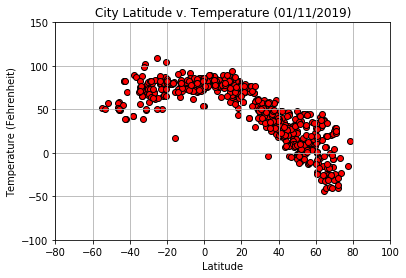

In [38]:
# Scatter plot to showcase the relationships:Temperature (F) vs. Latitude
# (marker="o", facecolors="red", edgecolors="black", s=scoop_price)
plt.scatter(df["Lat"], df["Temperature"], marker="o", facecolors="red", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude v. Temperature (01/11/2019)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Fehrenheit)")
plt.xlim(-80, 100)
plt.ylim(-100, 150)
plt.grid()

# # Save the image of the chart and print to screen
plt.savefig('LatTempScat.png')
plt.show()

In [ ]:
# Description of three observable trends based on the above data
# 1- The majority of the cities temperature in the random sample are above zero fehrenheit in this time of the year
# 2- Very few cities tempreture are above 100 degree fehrenheit.
# 3- More cities tempreture are below zero than above 100 degree fehrenheit.

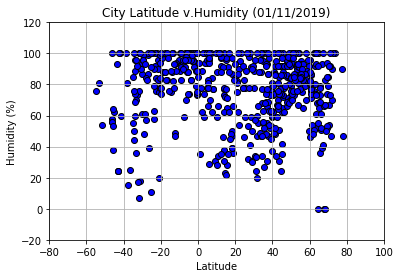

In [39]:
# Scatter plot to showcase the relationships: # Scatter plot to showcase the relationships: Humidity (%) vs. Latitude
# (marker="o", facecolors="blue", edgecolors="black", s=scoop_price)
plt.scatter(df["Lat"], df["Humidity"], marker="o", facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude v.Humidity (01/11/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.xlim(-80, 100)
plt.ylim(-20, 120)

# # Save the image of the chart and print to screen
plt.savefig('LatHumScat.png')
plt.show()

In [ ]:
# Description of three observable trends based on the above data
# 1- The majority of the humidities for the random sample are above 60% for this rtime of the year.
# 2- very few cities in the random sample are below 20% humidity for this time of the year.
# 3- More cities with positive latitude than negative.

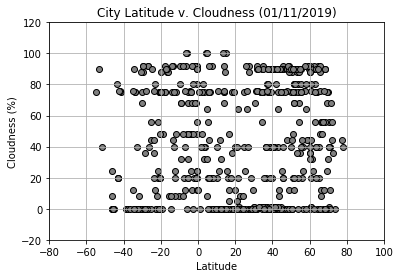

In [41]:
# Scatter plot to showcase the relationships: # Scatter plot to showcase the relationships: Cloudiness (%) vs. Latitude
# (marker="o", facecolors="gray", edgecolors="black", s=scoop_price)
plt.scatter(df["Lat"], df["Cloudness"], marker="o", facecolors="grey", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude v. Cloudness (01/11/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudness (%)")
plt.xlim(-80, 100)
plt.ylim(-20, 120)
plt.grid()

# # Save the image of the chart and print to screen
plt.savefig('LatCloudScat.png')
plt.show()

In [ ]:
# Description of three observable trends based on the above data
# 1- Very few cities in the random sample has a 100% cloudness for this time of the year.
# 2- More cities wwith zero cloudness to 100% cloudness.
# 3- A fewer citiesw has 40 to 60% cloudness.

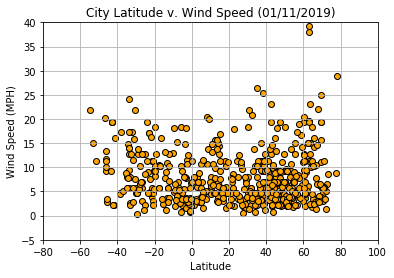

In [42]:
# Scatter plot to showcase the relationships: # Scatter plot to showcase the relationships: Wind Speed (mph) vs. Latitude
# (marker="o", facecolors="orange", edgecolors="black", s=scoop_price)
plt.scatter(df["Lat"], df["Wind Speed"], marker="o", facecolors="orange", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude v. Wind Speed (01/11/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.xlim(-80, 100)
plt.ylim(-5, 40)
plt.grid()

# # Save the image of the chart and print to screen
plt.savefig('LatWindScat.png')
plt.show()

In [ ]:
# Description of three observable trends based on the above data
# 1- Majirity of the cities wind speed in this random sample is less than 15 mph for this time of the year.
# 2- Only two cities in the random sample has wind speed of over 35 mph and they have a positive latitude.
# 3- The maximum wind speed for the cities with negative latitude is around 25 mph in this random sample at this time 
#   of the year.

In [43]:
df.to_csv('cities_weather.csv')